In [4]:
from matplotlib import pyplot as plt
import pickle
import random
import seaborn as sns
import pandas as pd                                 #Procesamiento de datos.
import numpy as np                                  #Álgebra lineal.
import math                                         #Para calcular función piso y techo.
import seaborn as sns
import joblib
seed=42
random.seed(seed)
np.random.seed(seed)

from sklearn import model_selection 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE, RandomOverSampler

In [5]:
df_Mayo_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202305.xlsx")

In [6]:
df_Junio_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202306.xlsx")

In [7]:
df_Julio_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202307.xlsx")

In [8]:
df_Agosto_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202308.xlsx")

In [9]:
df_Septiembre_2023 = pd.read_excel("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_C1/2024_modelo/datos_202309.xlsx")

In [209]:
cast_dias_sistema_Mayo_2023=df_Mayo_2023[df_Mayo_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Mayo_2023=df_Mayo_2023[df_Mayo_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Mayo_2023=df_Mayo_2023[df_Mayo_2023['mora_2_a']>150]
df_filt_Mayo_2023=df_Mayo_2023[df_Mayo_2023['dias_sistema']<=90]
df_filt_Mayo_2023=df_filt_Mayo_2023[df_filt_Mayo_2023['mora_1_a']<=120]
df_filt_Mayo_2023=df_filt_Mayo_2023[df_filt_Mayo_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Mayo_2023['CUPO'], 99)
cupo_mayor_Mayo_2023=df_filt_Mayo_2023[df_filt_Mayo_2023['CUPO'] > percentil_99]
df_filt_Mayo_2023['CUPO'] = df_filt_Mayo_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Mayo_2023 = df_filt_Mayo_2023.reset_index(drop=True)

In [210]:
cast_dias_sistema_Junio_2023=df_Junio_2023[df_Junio_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Junio_2023=df_Junio_2023[df_Junio_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Junio_2023=df_Junio_2023[df_Junio_2023['mora_2_a']>150]
df_filt_Junio_2023=df_Junio_2023[df_Junio_2023['dias_sistema']<=90]
df_filt_Junio_2023=df_filt_Junio_2023[df_filt_Junio_2023['mora_1_a']<=120]
df_filt_Junio_2023=df_filt_Junio_2023[df_filt_Junio_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Junio_2023['CUPO'], 99)
cupo_mayor_Junio_2023=df_filt_Junio_2023[df_filt_Junio_2023['CUPO'] > percentil_99]
df_filt_Junio_2023['CUPO'] = df_filt_Junio_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Junio_2023 = df_filt_Junio_2023.reset_index(drop=True)

                                        
cast_dias_sistema_Julio_2023=df_Julio_2023[df_Julio_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Julio_2023=df_Julio_2023[df_Julio_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Julio_2023=df_Julio_2023[df_Julio_2023['mora_2_a']>150]
df_filt_Julio_2023=df_Julio_2023[df_Julio_2023['dias_sistema']<=90]
df_filt_Julio_2023=df_filt_Julio_2023[df_filt_Julio_2023['mora_1_a']<=120]
df_filt_Julio_2023=df_filt_Julio_2023[df_filt_Julio_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Julio_2023['CUPO'], 99)
cupo_mayor_Julio_2023=df_filt_Julio_2023[df_filt_Julio_2023['CUPO'] > percentil_99]
df_filt_Julio_2023['CUPO'] = df_filt_Julio_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Julio_2023 = df_filt_Julio_2023.reset_index(drop=True)


cast_dias_sistema_Agosto_2023=df_Agosto_2023[df_Agosto_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Agosto_2023=df_Agosto_2023[df_Agosto_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Agosto_2023=df_Agosto_2023[df_Agosto_2023['mora_2_a']>150]
df_filt_Agosto_2023=df_Agosto_2023[df_Agosto_2023['dias_sistema']<=90]
df_filt_Agosto_2023=df_filt_Agosto_2023[df_filt_Agosto_2023['mora_1_a']<=120]
df_filt_Agosto_2023=df_filt_Agosto_2023[df_filt_Agosto_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Agosto_2023['CUPO'], 99)
cupo_mayor_Agosto_2023=df_filt_Agosto_2023[df_filt_Agosto_2023['CUPO'] > percentil_99]
df_filt_Agosto_2023['CUPO'] = df_filt_Agosto_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Agosto_2023 = df_filt_Agosto_2023.reset_index(drop=True)

cast_dias_sistema_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['dias_sistema']>90]
cast_dias_sistema_1m_a_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['mora_1_a']>120]
cast_dias_sistema_2m_a_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['mora_2_a']>150]
df_filt_Septiembre_2023=df_Septiembre_2023[df_Septiembre_2023['dias_sistema']<=90]
df_filt_Septiembre_2023=df_filt_Septiembre_2023[df_filt_Septiembre_2023['mora_1_a']<=120]
df_filt_Septiembre_2023=df_filt_Septiembre_2023[df_filt_Septiembre_2023['mora_2_a']<=150]
percentil_99 = np.percentile(df_filt_Septiembre_2023['CUPO'], 99)
cupo_mayor_Septiembre_2023=df_filt_Septiembre_2023[df_filt_Septiembre_2023['CUPO'] > percentil_99]
df_filt_Septiembre_2023['CUPO'] = df_filt_Septiembre_2023['CUPO'].apply(lambda x: percentil_99 if x >= percentil_99 else x)
df_filt_Septiembre_2023 = df_filt_Septiembre_2023.reset_index(drop=True)

In [211]:
df_filt_Mayo_2023['marca_default'].value_counts()

marca_default
0    101528
1     47824
Name: count, dtype: int64

In [212]:
df_filt_Mayo_2023['marca_default'].value_counts()/len(df_filt_Mayo_2023)

marca_default
0    0.67979
1    0.32021
Name: count, dtype: float64

In [213]:
print("Total de individuos filtrados:\n",(len(df_Mayo_2023)-len(df_filt_Mayo_2023)))

Total de individuos filtrados:
 8020


#### Variables a tener en cuenta

In [323]:
variables3=['dias_sistema','P_MP6','TP_pp','CUPO','mora_1_a','PR_O_D','mora_2_a','C_AuM','PR_1_D','marca_default']
cuantis=["dias_sistema", "CUPO", "mora_1_a", "mora_2_a"]
cualis=["marca_default", "P_MP6", "TP_pp", "PR_O_D","C_AuM", "PR_1_D"]
#OPCIÓN DE SELECCIÓN DE VARIABLES DE ACUERDO AL STEPWISE
df1=df_filt_Mayo_2023[variables3]
df1.describe()

,dias_sistema,P_MP6,TP_pp,CUPO,mora_1_a,PR_O_D,mora_2_a,C_AuM,PR_1_D,marca_default
count,149352.000000,149352.000000,149352.000000,1.493520e+05,149352.000000,149352.000000,149352.000000,149352.000000,149352.000000,149352.000000
mean,16.096684,0.651602,0.211668,2.918076e+06,14.772691,0.201464,13.051710,0.162609,0.384280,0.320210
std,26.313760,0.476465,0.408492,1.982800e+06,26.313752,0.401095,25.884611,0.369010,0.486426,0.466559
min,0.000000,0.000000,0.000000,5.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.200000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,2.440000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,1.000000,0.000000,4.500000e+06,21.000000,0.000000,12.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,6.600000e+06,119.000000,1.000000,150.000000,1.000000,1.000000,1.000000


In [324]:
scaler = MinMaxScaler()
df1[cuantis] = scaler.fit_transform(df1[cuantis])

###Esta linea guarda el escalador para las variables cuantitativas, para ser usado en los datasets a calificar
joblib.dump(scaler, 'escalador_minmax_modelo_log.pkl') 

for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])
    
print(df1['marca_default'].value_counts())

X=df1.drop(columns=["marca_default"])
y=df1["marca_default"]

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['marca_default'], random_state=seed)

marca_default
0    101528
1     47824
Name: count, dtype: int64


C:\Users\damartinezp\AppData\Local\Temp\ipykernel_25084\2366377065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cuantis] = scaler.fit_transform(df1[cuantis])


#### Tamaños de dataset de entrenamiento y test con el respectivo evento.

In [325]:
print("Tamaño en entrenamiento:\n",len(train))
print("Tamaño en test:\n",len(test))

Tamaño en entrenamiento:
 119481
Tamaño en test:
 29871


In [326]:
print("Evento en entrenamiento:\n",train['marca_default'].value_counts())
print("\nEvento en test:\n",test['marca_default'].value_counts())

Evento en entrenamiento:
 marca_default
0    81222
1    38259
Name: count, dtype: int64

Evento en test:
 marca_default
0    20306
1     9565
Name: count, dtype: int64


In [327]:
#"Comprobación de datos faltantes"
#df1.isna().sum()

In [328]:
#Métricas de evaluación de manera manual
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

#### Entrenamiento con 10 fold, validación cruzada

In [329]:
import os
num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

save_dir = 'saved_model0_Mayo/Logistic/'
os.makedirs(save_dir, exist_ok=True)  # Crea el directorio si no existe

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixLogistic=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['marca_default']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['marca_default'], axis=1)
    
    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train, y_val = train['marca_default'].iloc[train_indices], train['marca_default'].iloc[val_indices]
    
    model=LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_proba=pd.DataFrame(model.predict_proba(X_val))[1]
    threshold=0.5 #Umbral de clasificación
    y_pred_labels= np.where(y_pred_proba>=threshold,1,0)
    
    cm=confusion_matrix(y_val, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    
    accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_val, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }
    matrixLogistic = pd.concat([matrixLogistic, pd.DataFrame([matrix])], ignore_index=True)
    
    
    with open(f'saved_model0_Mayo/Logistic/{fold_no}.model', 'wb') as file:
        pickle.dump(model, file)
    
    fold_no +=1

print(matrixLogistic)

matrixLogistic.describe().loc['mean']

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC  Log_Loss
0  75.40  24.60  36.67  93.59  72.88  6.41  48.79    65.13      8.87
1  76.26  23.74  38.45  93.66  73.61  6.34  50.51    66.05      8.56
2  74.82  25.18  36.91  93.25  72.64  6.75  48.95    65.08      9.07
3  75.21  24.79  37.69  93.50  73.87  6.50  49.92    65.60      8.94
4  75.40  24.60  36.92  93.69  73.55  6.31  49.16    65.30      8.87
5  76.22  23.78  37.53  94.05  74.38  5.95  49.89    65.79      8.57
6  76.05  23.95  37.47  93.89  73.94  6.11  49.74    65.68      8.63
7  75.20  24.80  37.04  93.43  72.94  6.57  49.13    65.24      8.94
8  75.34  24.66  37.46  93.53  73.56  6.47  49.64    65.50      8.89
9  75.66  24.34  36.21  93.48  71.48  6.52  48.07    64.84      8.77


Acc         75.556
Err         24.444
Re          37.235
Sp          93.607
Pre         73.285
FPR          6.393
F1          49.380
ROC_AUC     65.421
Log_Loss     8.811
Name: mean, dtype: float64

### Variable salida y predicciones 

In [331]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

X = df1[cuantis]
y = df1['marca_default']

# Añadir la constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo logístico
model = sm.Logit(y, X).fit()

# Ver los resultados del modelo
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.611202
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          marca_default   No. Observations:               149352
Model:                          Logit   Df Residuals:                   149347
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                 0.02524
Time:                        11:32:28   Log-Likelihood:                -91284.
converged:                       True   LL-Null:                       -93648.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0036      0.011    -93.650      0.000      -1.025      -0.983
dias_sistema     0.8325

### Validación de multicolinealidad

In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df1[cuantis+cualis]
X= X.drop(["marca_default"], axis=1)
y = df1['marca_default']

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Valores VIF:\n")
print(vif.round(1))

Valores VIF:

       Variable  VIF
0  dias_sistema  2.9
1          CUPO  3.2
2      mora_1_a  5.0
3      mora_2_a  3.3
4         P_MP6  2.7
5         TP_pp  1.6
6        PR_O_D  1.4
7         C_AuM  1.4
8        PR_1_D  2.1


## Test Modelo Logístico

### Backtest Mayo (Train y Test)

In [226]:
from matplotlib import pyplot as plt
import pickle
import random
import seaborn as sns
import pandas as pd                                 #Procesamiento de datos.
import numpy as np                                  #Álgebra lineal.
import math                                         #Para calcular función piso y techo.
import seaborn as sns
import joblib
scaler_cargado = joblib.load('escalador_minmax_modelo_log.pkl')
seed=42
random.seed(seed)
np.random.seed(seed)

from sklearn import model_selection 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE, RandomOverSampler

In [227]:
df1=df_filt_Mayo_2023[variables3]

In [228]:
print(df1['marca_default'].value_counts())

marca_default
0    101528
1     47824
Name: count, dtype: int64


In [229]:
df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])

X=df1.drop(columns=["marca_default"])
y=df1["marca_default"]

train_size=0.8
#train, test2 = model_selection.train_test_split(df2,train_size=int(train_size*len(df2)), stratify=df2['marca_default'], random_state=seed)
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['marca_default'], random_state=seed)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_25084\3216320702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])


In [230]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

### Cargando el modelo

In [388]:
model_path_1 = f'saved_model0_Mayo/Logistic/1.model'
model_path_2 = f'saved_model0_Mayo/Logistic/2.model'
model_path_3 = f'saved_model0_Mayo/Logistic/3.model'
model_path_4 = f'saved_model0_Mayo/Logistic/4.model'
model_path_5 = f'saved_model0_Mayo/Logistic/5.model'
model_path_6 = f'saved_model0_Mayo/Logistic/6.model'
model_path_7 = f'saved_model0_Mayo/Logistic/7.model'
model_path_8 = f'saved_model0_Mayo/Logistic/8.model'
model_path_9 = f'saved_model0_Mayo/Logistic/9.model'
model_path_10 = f'saved_model0_Mayo/Logistic/10.model'

with open(model_path_1, 'rb') as file:
    model_1 = pickle.load(file)
with open(model_path_2, 'rb') as file:
    model_2 = pickle.load(file)
with open(model_path_3, 'rb') as file:
    model_3 = pickle.load(file)
with open(model_path_4, 'rb') as file:
    model_4 = pickle.load(file)
with open(model_path_5, 'rb') as file:
    model_5 = pickle.load(file)
with open(model_path_6, 'rb') as file:
    model_6 = pickle.load(file)
with open(model_path_7, 'rb') as file:
    model_7 = pickle.load(file)
with open(model_path_8, 'rb') as file:
    model_8 = pickle.load(file)
with open(model_path_9, 'rb') as file:
    model_9 = pickle.load(file)
with open(model_path_10, 'rb') as file:
    model_10 = pickle.load(file)

In [389]:
weights = pd.Series(model_1.coef_[0], index=X.columns.values)
print("Weights for each variables is a follows...")
print(weights)
print("Intercepto:", model_1.intercept_[0])

Weights for each variables is a follows...
dias_sistema    1.411164
CUPO           -0.920072
mora_1_a       -1.754162
mora_2_a        0.552347
P_MP6          -0.713004
TP_pp           0.133845
PR_O_D         -0.471735
C_AuM           1.261508
PR_1_D         -0.436952
dtype: float64
Intercepto: -0.32244390409607326


In [390]:
X_test = train.drop(columns=["marca_default"])
y_test = train["marca_default"]

In [391]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
#X_train = X_train.reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)

In [392]:
registros_completos = X_test.dropna()
registros_faltantes = X_test[X_test.isnull().any(axis=1)]
print("Cantidad de datos con registros faltantes en alguna de las variables:", len(registros_faltantes))
print("\n\n Cantidad de datos con registros completos:", len(registros_completos))

Cantidad de datos con registros faltantes en alguna de las variables: 0


 Cantidad de datos con registros completos: 119481


In [393]:
proba=0.5

In [394]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [395]:
pd.DataFrame(y_pred_proba).describe().T

,count,mean,std,min,25%,50%,75%,max
0,119481.0,0.320218,0.200868,0.028703,0.199203,0.253835,0.372203,0.927802


In [396]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [397]:
matrix

{'Acc': 75.55,
 'Err': 24.45,
 'Re': 37.22,
 'Sp': 93.61,
 'Pre': 73.28,
 'FPR': 6.39,
 'F1': 49.37,
 'ROC_AUC': 65.41,
 'Log_Loss': 8.81}

<AxesSubplot:>

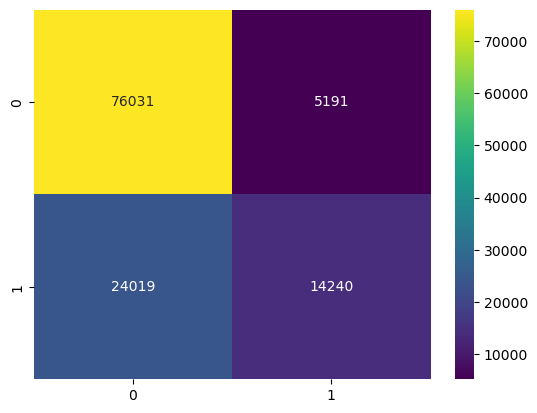

In [398]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [399]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_TuCrédito/2024_modelo/train_logistic_202305.csv")

In [400]:
print(df_output['marca_default'].value_counts())

marca_default
0    81222
1    38259
Name: count, dtype: int64


In [401]:
deciles = np.percentile(y_pred_proba, [10, 20, 30, 40, 50, 60, 70, 80, 90,100])
inferior=0
superior=1
deciles = np.append(inferior,deciles)
deciles[-1]=superior
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [402]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo['marca_default'].sum())
    no_eventos.append(len(intervalo) - intervalo['marca_default'].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output['marca_default'].sum()
total_no_eventos = len(df_output) - df_output['marca_default'].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
df1 = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(df1)

In [403]:
df_resultado

,Min,Max,0,1,total
0,0.679562,1.000000,2855,9094,11949
1,0.432845,0.679562,4340,7608,11948
2,0.325155,0.432845,5545,6412,11957
3,0.279980,0.325155,8393,3680,12073
4,0.253835,0.279980,9467,2528,11995
5,0.236146,0.253835,9492,2275,11767
6,0.213646,0.236146,9824,2151,11975
7,0.185070,0.213646,10533,1408,11941
8,0.155327,0.185070,11179,917,12096
9,0.000000,0.155327,9594,2186,11780


In [404]:
deciles_train_06=deciles

### Test

In [405]:
X_test = test.drop(columns=["marca_default"])
y_test = test["marca_default"]

In [406]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [407]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [408]:
pd.DataFrame(y_pred_proba).describe().T

,count,mean,std,min,25%,50%,75%,max
0,29871.0,0.319755,0.200591,0.028726,0.198936,0.254143,0.372223,0.929463


In [409]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [410]:
matrix

{'Acc': 75.43,
 'Err': 24.57,
 'Re': 36.75,
 'Sp': 93.66,
 'Pre': 73.18,
 'FPR': 6.34,
 'F1': 48.93,
 'ROC_AUC': 65.2,
 'Log_Loss': 8.85}

<AxesSubplot:>

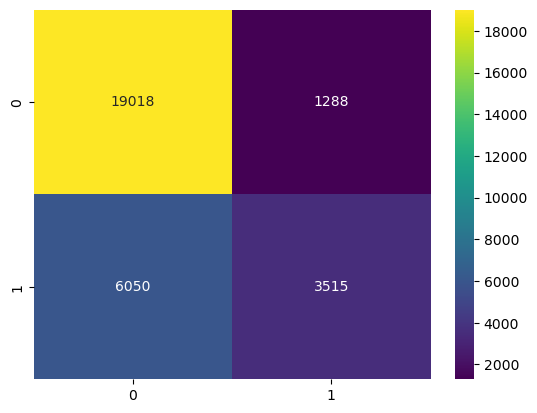

In [411]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [412]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_TuCrédito/2024_modelo/test_logistic_202305.csv")

In [413]:
df_output

,V1,puntaje,marca_default
0,1,0.298879,0
1,2,0.134801,0
2,3,0.601566,0
3,4,0.233067,1
4,5,0.579152,1
...,...,...,...
29866,29867,0.585225,1
29867,29868,0.409189,0
29868,29869,0.285061,0
29869,29870,0.259204,1


In [414]:
print(df_output['marca_default'].value_counts())

marca_default
0    20306
1     9565
Name: count, dtype: int64


In [415]:
deciles = deciles_train_06

In [416]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo['marca_default'].sum())
    no_eventos.append(len(intervalo) - intervalo['marca_default'].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output['marca_default'].sum()
total_no_eventos = len(df_output) - df_output['marca_default'].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
df1 = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(df1)

In [417]:
df_resultado

,Min,Max,0,1,total
0,0.679562,1.000000,729,2216,2945
1,0.432845,0.679562,1101,1922,3023
2,0.325155,0.432845,1412,1610,3022
3,0.279980,0.325155,2100,987,3087
4,0.253835,0.279980,2309,654,2963
5,0.236146,0.253835,2321,548,2869
6,0.213646,0.236146,2478,493,2971
7,0.185070,0.213646,2635,323,2958
8,0.155327,0.185070,2772,258,3030
9,0.000000,0.155327,2449,554,3003


## Backtest Junio

In [418]:
df1=df_filt_Junio_2023[variables3]

In [419]:
df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])


X=df1.drop(columns=["marca_default"])
y=df1["marca_default"]

#train_size=0.8
#train, test2 = model_selection.train_test_split(df2,train_size=int(train_size*len(df2)), stratify=df2['marca_default'], random_state=seed)
#train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['marca_default'], random_state=seed)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_25084\4061222233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])


In [420]:
X_test = X
y_test = y

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [421]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [422]:
pd.DataFrame(y_pred_proba).describe().T

,count,mean,std,min,25%,50%,75%,max
0,147862.0,0.34005,0.21121,0.027071,0.201613,0.263559,0.435895,0.928644


In [423]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [424]:
matrix

{'Acc': 77.74,
 'Err': 22.26,
 'Re': 47.68,
 'Sp': 90.46,
 'Pre': 67.91,
 'FPR': 9.54,
 'F1': 56.02,
 'ROC_AUC': 69.07,
 'Log_Loss': 8.02}

<AxesSubplot:>

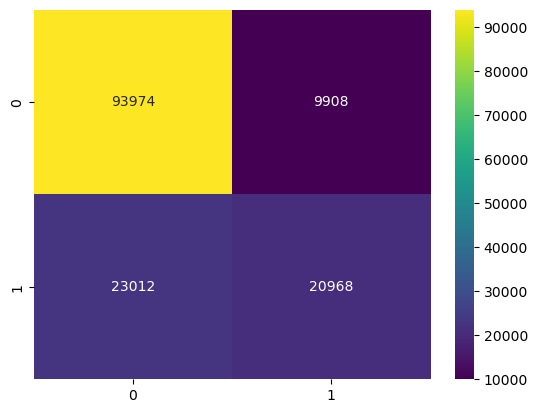

In [425]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [426]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_TuCrédito/2024_modelo/datos_salida_logistic_202306.csv")

In [427]:
df_output

,V1,puntaje,marca_default
0,1,0.202591,0
1,2,0.227688,0
2,3,0.854168,1
3,4,0.285690,0
4,5,0.732464,1
...,...,...,...
147857,147858,0.355871,0
147858,147859,0.683341,1
147859,147860,0.283308,0
147860,147861,0.295334,1


In [428]:
print(df_output['marca_default'].value_counts())

marca_default
0    103882
1     43980
Name: count, dtype: int64


In [429]:
deciles = deciles_train_06

In [430]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo['marca_default'].sum())
    no_eventos.append(len(intervalo) - intervalo['marca_default'].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output['marca_default'].sum()
total_no_eventos = len(df_output) - df_output['marca_default'].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
df1 = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(df1)

In [431]:
df_resultado

,Min,Max,0,1,total
0,0.679562,1.000000,4502,13306,17808
1,0.432845,0.679562,9300,10105,19405
2,0.325155,0.432845,9275,4992,14267
3,0.279980,0.325155,10188,4011,14199
4,0.253835,0.279980,11437,2970,14407
5,0.236146,0.253835,10658,1861,12519
6,0.213646,0.236146,10944,1602,12546
7,0.185070,0.213646,12800,1443,14243
8,0.155327,0.185070,12913,897,13810
9,0.000000,0.155327,11865,2793,14658


## Backtest Julio

In [432]:
df1=df_filt_Julio_2023[variables3]

In [433]:
df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])


X=df1.drop(columns=["marca_default"])
y=df1["marca_default"]

#train_size=0.8
#train, test2 = model_selection.train_test_split(df2,train_size=int(train_size*len(df2)), stratify=df2['marca_default'], random_state=seed)
#train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['marca_default'], random_state=seed)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_25084\4061222233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])


In [434]:
X_test = X
y_test = y

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [435]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [436]:
pd.DataFrame(y_pred_proba).describe().T

,count,mean,std,min,25%,50%,75%,max
0,139654.0,0.34053,0.213266,0.026889,0.199457,0.26183,0.456195,0.929463


In [437]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [438]:
matrix

{'Acc': 76.37,
 'Err': 23.63,
 'Re': 44.36,
 'Sp': 89.68,
 'Pre': 64.14,
 'FPR': 10.32,
 'F1': 52.45,
 'ROC_AUC': 67.02,
 'Log_Loss': 8.52}

<AxesSubplot:>

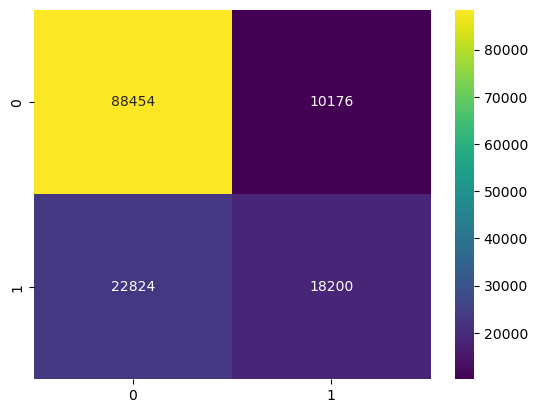

In [439]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [440]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_TuCrédito/2024_modelo/datos_salida_logistic_202307.csv")

In [441]:
df_output

,V1,puntaje,marca_default
0,1,0.202591,0
1,2,0.227688,0
2,3,0.685054,1
3,4,0.285690,0
4,5,0.469739,1
...,...,...,...
139649,139650,0.639924,1
139650,139651,0.291648,0
139651,139652,0.807623,0
139652,139653,0.582936,1


In [442]:
print(df_output['marca_default'].value_counts())

marca_default
0    98630
1    41024
Name: count, dtype: int64


In [443]:
deciles = deciles_train_06

In [444]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo['marca_default'].sum())
    no_eventos.append(len(intervalo) - intervalo['marca_default'].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output['marca_default'].sum()
total_no_eventos = len(df_output) - df_output['marca_default'].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
df1 = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(df1)

In [445]:
df_resultado

,Min,Max,0,1,total
0,0.679562,1.000000,3804,11932,15736
1,0.432845,0.679562,12191,10684,22875
2,0.325155,0.432845,5942,5225,11167
3,0.279980,0.325155,9341,2981,12322
4,0.253835,0.279980,10429,1833,12262
5,0.236146,0.253835,10108,1637,11745
6,0.213646,0.236146,10354,1653,12007
7,0.185070,0.213646,12409,1314,13723
8,0.155327,0.185070,11971,834,12805
9,0.000000,0.155327,12081,2931,15012


## Backetest Agosto

In [446]:
df1=df_filt_Agosto_2023[variables3]

In [447]:
df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])

X=df1.drop(columns=["marca_default"])
y=df1["marca_default"]

#train_size=0.8
#train, test2 = model_selection.train_test_split(df2,train_size=int(train_size*len(df2)), stratify=df2['marca_default'], random_state=seed)
#train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['marca_default'], random_state=seed)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_25084\2737950152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])


In [448]:
X_test = X
y_test = y

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [449]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [450]:
pd.DataFrame(y_pred_proba).describe().T

,count,mean,std,min,25%,50%,75%,max
0,133181.0,0.320622,0.197988,0.02483,0.194593,0.256535,0.401402,0.929818


In [451]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [452]:
matrix

{'Acc': 76.27,
 'Err': 23.73,
 'Re': 38.88,
 'Sp': 89.86,
 'Pre': 58.21,
 'FPR': 10.14,
 'F1': 46.62,
 'ROC_AUC': 64.37,
 'Log_Loss': 8.55}

<AxesSubplot:>

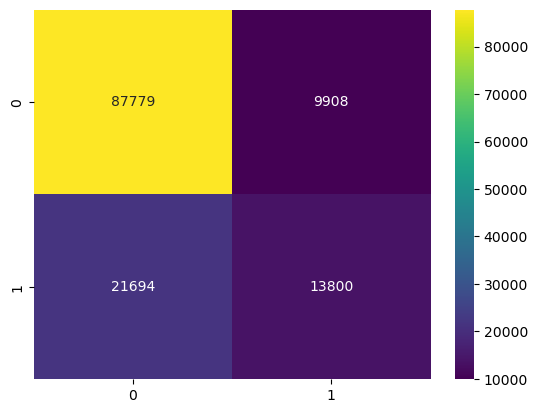

In [453]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [454]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_TuCrédito/2024_modelo/datos_salida_logistic_202308.csv")

In [455]:
df_output

,V1,puntaje,marca_default
0,1,0.202978,0
1,2,0.227970,0
2,3,0.727188,1
3,4,0.285690,0
4,5,0.349264,1
...,...,...,...
133176,133177,0.709645,1
133177,133178,0.277627,0
133178,133179,0.861509,1
133179,133180,0.735428,1


In [456]:
print(df_output['marca_default'].value_counts())

marca_default
0    97687
1    35494
Name: count, dtype: int64


In [457]:
deciles = deciles_train_06

In [458]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo['marca_default'].sum())
    no_eventos.append(len(intervalo) - intervalo['marca_default'].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output['marca_default'].sum()
total_no_eventos = len(df_output) - df_output['marca_default'].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
df1 = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(df1)

In [459]:
df_resultado

,Min,Max,0,1,total
0,0.679562,1.000000,4112,8917,13029
1,0.432845,0.679562,10155,6712,16867
2,0.325155,0.432845,6977,5863,12840
3,0.279980,0.325155,9299,4156,13455
4,0.253835,0.279980,9982,2056,12038
5,0.236146,0.253835,9498,1669,11167
6,0.213646,0.236146,9901,1575,11476
7,0.185070,0.213646,12255,1207,13462
8,0.155327,0.185070,12278,814,13092
9,0.000000,0.155327,13230,2525,15755


## Backtest Septiembre

In [460]:
df1=df_filt_Septiembre_2023[variables3]

In [461]:
df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1.loc[:, i] = labelencoder.fit_transform(df1[i])

X=df1.drop(columns=["marca_default"])
y=df1["marca_default"]

#train_size=0.8
#train, test2 = model_selection.train_test_split(df2,train_size=int(train_size*len(df2)), stratify=df2['marca_default'], random_state=seed)
#train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['marca_default'], random_state=seed)

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_25084\2737950152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cuantis] = scaler_cargado.fit_transform(df1[cuantis])


In [462]:
X_test = X
y_test = y

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [463]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6
             +y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [464]:
pd.DataFrame(y_pred_labels).describe().T

,count,mean,std,min,25%,50%,75%,max
0,114319.0,0.169307,0.375024,0.0,0.0,0.0,0.0,1.0


In [465]:
pd.DataFrame(y_pred_proba).describe().T

,count,mean,std,min,25%,50%,75%,max
0,114319.0,0.319916,0.200776,0.026488,0.188497,0.252256,0.425659,0.926585


In [466]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [467]:
matrix

{'Acc': 78.25,
 'Err': 21.75,
 'Re': 40.03,
 'Sp': 90.42,
 'Pre': 57.09,
 'FPR': 9.58,
 'F1': 47.06,
 'ROC_AUC': 65.23,
 'Log_Loss': 7.84}

<AxesSubplot:>

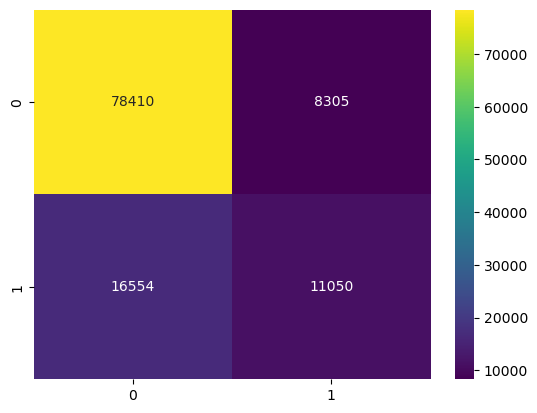

In [468]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [469]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "marca_default": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))
df_output.to_csv("C:/Users/damartinezp/OneDrive - BAN100 S.A/Documentos/Proyectos Borrador/PD_TuCrédito/2024_modelo/datos_salida_logistic_202309.csv")

In [470]:
df_output

,V1,puntaje,marca_default
0,1,0.203293,0
1,2,0.228198,0
2,3,0.814185,1
3,4,0.198812,0
4,5,0.190680,0
...,...,...,...
114314,114315,0.511622,1
114315,114316,0.371591,0
114316,114317,0.892523,1
114317,114318,0.459034,1


In [471]:
print(df_output['marca_default'].value_counts())

marca_default
0    86715
1    27604
Name: count, dtype: int64


In [472]:
deciles = deciles_train_06

In [473]:
# Calcular el número de eventos y no eventos para cada intervalo de decil
eventos = []
no_eventos = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    eventos.append(intervalo['marca_default'].sum())
    no_eventos.append(len(intervalo) - intervalo['marca_default'].sum())
eventos.reverse()
no_eventos.reverse()
    
# Calcular el total de eventos y no eventos
total_eventos = df_output['marca_default'].sum()
total_no_eventos = len(df_output) - df_output['marca_default'].sum()
total_bin = [x + y for x, y in zip(eventos,no_eventos)]
df1 = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_eventos,
        '1': eventos,
        'total': total_bin}
df_resultado = pd.DataFrame(df1)

In [474]:
df_resultado

,Min,Max,0,1,total
0,0.679562,1.000000,3677,6198,9875
1,0.432845,0.679562,9385,7915,17300
2,0.325155,0.432845,7310,4668,11978
3,0.279980,0.325155,6522,1985,8507
4,0.253835,0.279980,7354,1697,9051
5,0.236146,0.253835,8035,1057,9092
6,0.213646,0.236146,8835,899,9734
7,0.185070,0.213646,11121,787,11908
8,0.155327,0.185070,11405,522,11927
9,0.000000,0.155327,13071,1876,14947


### Coeficientes del modelo

In [386]:
model_8.intercept_

array([-0.31711393])

In [387]:
model_8.coef_[0]

array([ 1.4036224 , -0.92993152, -1.76948464,  0.54927106, -0.68422796,
        0.14698258, -0.48605881,  1.24040463, -0.42893507])